# Projet: Analyse des données de No-show appointments

## Table des matières
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Le nombre de rendez-vous manqués des patients dans les centres de santé brésiliens est non négligeable. 
Dans ce projet nous analyserons un ensemble de données de +100K rendez-vous médicaux programmés dans des structures de santé brésiliennes en vue de découvrir les tendances pouvant nous aider à expliquer les raisons possibles pour lesquelles un patient quoique programmé pour un rendez-vous médical ne se présente pas. Les questions qui suivent nous guiderons dans notre anlyse 

*  Quelles sont les proportions respectives des patients qui se sont présentés ou non à leur rendez-vous médical ?

*  Les patients ne respecteraient-il pas leur rendez-vous par simple oubli ?

*  L'aide sociale serait-elle un facteur qui expliquerait le fait qu'un patient ne se présente pas à son rendez-vous  ?

In [1]:
# Importation des packages utiles au projet.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Cette rubrique sera consacrée au chargement, à l'évaluation et au nettoyage de nos données

### General Properties

In [2]:
# Chargement de l'ensemble des données contenu dans le fichier 'noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# Affichons quelques lignes du fichier pour se faire une idée de son contenu
df.sample()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
56735,5.922974e+09,5713564,M,2016-05-18T10:19:35Z,2016-05-19T00:00:00Z,58,ILHA DO PRÍNCIPE,0,0,0,0,0,0,No


In [3]:
# Affichons également quelques lignes de la fin du fichier pour voir si des lignes vides supplémentaires n'existent pas
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
# Affichons le résumé de la dataframe pour récupérer quelques informations utiles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Nous sommes en présence d'une dataframe comportant **110 527 lignes** et **14 colonnes**. Le résumé montre que la variable PatientId est de type float. Les variables Gender, ScheduledDay, AppointmentDay, Neighbourhood et No-show sont de type object; et le reste des variables sont de type int64. La dataset ne comporte pas valeurs manquantes.

In [5]:
# Affichons quelques statistiques de la dataframe pour voir si nous pouvons identifier des éléments remarquables.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Les statistiques descriptives révèlent ceci: 
* L'âge minimum est **-1**. Ils existent également des personnes d'âge avancé (**max = 115 ans**). La moyenne d'âge des patients est 37 ans et la majorité se situe entre 18 et 55 ans
* Le nombre de patients qui reçoivent une aide social (Scholarship) est faible, moins de 10% de l'effectif total (mean = 0.098266 soit 9,83%)
* 20% environ des patients de l'effectif sont hypertendus (mean[hipertension]=0.197246), 7% diabétiques (mean[Diabetes]= 0.071865), 3% alcooliques et 2% ont un handicap
* Seul 32% de l'effectif a reçu un SMS de rappel, mean[SMS_received] = 0.321026

In [6]:
# Voyons si la dataset ne comporte pas de doublons
df.duplicated().sum()

0

### Data Cleaning

Maintenant que nous avons une idée un peu plus claire des données de notre dataset nous allons effectuer un peu de nettoyage en parcourant les données variable par variable.

In [7]:
# Avant de débuter le nettoyage faisons une copie de la datframe afin de préserver les données sources.
df_bak = df.copy() # copie df dans df_bak

In [8]:
# PatientId est de type float. En tant qu'identifiant il est plutôt convenable qu'il soit de type int
df.PatientId = df.PatientId.astype('int64')

In [9]:
# Vérifions si la correction a été prise en compte
df.PatientId.dtype

dtype('int64')

In [10]:
# Affichons les valeurs uniques de la variable Gender
df.Gender.unique()

array(['F', 'M'], dtype=object)

La variable Gender comporte uniquement 2 valeurs : **'F'** et **'M'**. **'F'** pourrait représenter le genre féminin et **'M'** le genre masculin

In [11]:
# Nous allons convertir les champs ScheduledDay et AppointmentDay en type datetime pour en faciliter la manipulation
df[['ScheduledDay','AppointmentDay']] = df[['ScheduledDay','AppointmentDay']].apply(pd.to_datetime,errors='coerce')

In [12]:
# Vérifions si les modifications ont été appliquées
df.ScheduledDay.dtype

datetime64[ns, UTC]

In [13]:
df.AppointmentDay.dtype

datetime64[ns, UTC]

In [14]:
# Les statistiques nous ont montré que l'âge minimum est -1 et le max 115
# Voyons les occurrences dont l'âge est -1
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [15]:
# Nous n'avons qu'une seule occurrence, sa suppression de devrait pas avoir une réelle incidence sur l'analyse
df.drop(df[df.Age < 0].index, inplace=True)

In [16]:
# Controlons si notre occurrence a bel et bien été supprimé
df[df.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


La colonne **Neighbourhood** représente le nom des lieux où les rendez-vous ont eu lieu. Nous ne maîtrisons pas le nom de ses lieux au Brésil, alors il n'y a pas grand chose à faire sur cette colonne.

In [17]:
# Voyons les valeurs uniques de la variable Scholarship
df.Scholarship.unique()

array([0, 1], dtype=int64)

2 valeurs : '**0**' si le patient est inscrit à l'aide sociale et '**1**' si non. Ceci est conforme a ce qui a été décrit dans le document source.

In [18]:
# Nous allons renommer la colonne Hipertension car le mot a été mal orthographié
df.rename(columns={'Hipertension':'Hypertension'},inplace=True)
# Voyons si la colonne a été renommée
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [19]:
# Controloons les valeurs uniques de Hypertension
df.Hypertension.unique()

array([1, 0], dtype=int64)

In [20]:
# Controlons les valeurs uniques de la colonne Diabetes
df.Diabetes.unique()

array([0, 1], dtype=int64)

In [21]:
# Voyons les valeurs uniques de Alcoholism
df.Alcoholism.unique()

array([0, 1], dtype=int64)

In [22]:
# Nous allons renommer la colonne Handcap car le mot a été mal orthographié
df.rename(columns={'Handcap':'Handicap'},inplace=True)
# Voyons si la colonne a été renommée
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [23]:
# Controlons les valeurs uniques de Handicap
df.Handicap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

D'après la documentation source, les valeurs de Handicap devrraient être True ou False. Ici nous voyons que les valeurs vont de 0 à 4 ce qui peut paraître anormal.

In [24]:
# Jettons un coup d'oeil à la proportion de chaque valeur
df.Handicap.value_counts(normalize=True)*100

0    97.972423
1     1.847529
2     0.165572
3     0.011762
4     0.002714
Name: Handicap, dtype: float64

On peut voir que **98%** de l'effectif ne présente pas de handicap, ce qui réflète un peu la réalité. Seul un infime partie de la population est handicapée. On peut supposer que les valeurs de 1 à 4 représentent des types de handicap. Dans cette analyse nous nous intéresseront seulement au fait qu'un patient soit handicapé ou non. Ainsi nous allons considérer toutes les valeurs > 1 comme ayant un handicap, et donc les remplacer par 1.

In [25]:
# Remplaçons les valeurs 2, 3 et 4 de Handicap par 1
df.Handicap.replace({2:1,3:1,4:1},inplace=True)
# Vérifions si les nouvelles valeurs on vraiment été appliquées
df.Handicap.unique()

array([0, 1], dtype=int64)

In [26]:
# Découvrons les valeurs uniques de SMS_received
df.SMS_received.unique()

array([0, 1], dtype=int64)

Nous allons faire un petit travail sur la colonne '**No-show**'. Les valeurs telles que présentées ('**No**' = le patient s'est présenté au rendez-vous, '**Yes**' = le patient ne s'est pas présenté au rendez-vous) peuvent prêter à confusion. Nous allons donc renommer la colonne '**Show**' et permuter les valeurs '**Yes**' et '**No**'

In [27]:
# Renommer la colonne 'No-show' en 'Show'
df.rename(columns={'No-show':'Show'},inplace=True)
# Vérifier si la colonne a été effectivement renommée
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [28]:
# Remplacer les valeurs 'No' en 'Yes' et vice versa
df.Show.replace({'No':'Yes','Yes':'No'},inplace=True)
# Vérifier si les valeurs ont été effectivement remplacées
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


Il serait aussi beaucoup plus aisé de manipuler des valeurs booléennes plutôt que des '**Yes**' et '**No**'. Pour ce faire nous allons remplacer les valeurs '**No**' et '**Yes**' de la colonne '**Show**' respectivement par '**0**' et '**1**'

In [29]:
# Remplacer les valeurs 'No' par 0 et 'Yes' par '1'
df.Show.replace({'No':0,'Yes':1},inplace=True)
# Vérifier si les valeurs ont été effectivement remplacées
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


Les colonnes '**PatientId**' et '**AppointmentID**' sont spécifiques à chaque patient et rendez-vous, respectivement. Elle ne seront pas très utiles à notre analyse. Nous pouvons donc les supprimer.

In [30]:
# Supprimer les colonnes PatientId et AppointmentID
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)
# Vérifions si les deux colonnes ont été supprimées
df.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1


<a id='eda'></a>
## Exploratory Data Analysis

> Dans cette rubrique nous allons essayer de répondre aux questions que nous nous sommes posées dès le début.

### Quelles sont les proportions respectives des patients qui se sont présentés ou non à leur rendez-vous médical ?


>L'objectif de cette analyse étant de trouver quels facteurs importants peuvent permettre de prédire si un patient se présentera à un rendez-vous ou non, nous retiendrons "No-show" comme variable dépendante (celle à expliquer).  
Pour commencer, partant de la dataset, nous allons essayer de voir la proportion de chacun des deux groupes de patients suivants : ceux qui se sont présentés au rendez-vous "**No-show = No**" et ceux qui n'ont pas honoré leur rendez-vous "**No-show = Yes**"

In [31]:
# Cette fonction nous permet d'afficher côte à côte le diagramme à barres (pour les effectifs) 
# et le diagramme circulaire pour le pourcentage de chaque effectif
def display_subplots(data_serie, plt1_params={}, plt2_params={}):
    plt.figure(figsize=(12,5))

    # Création du premier sous graphique (diagramme à barre)
    plt.subplot(121)
    if plt1_params:
        # Définir le titre du graphique
        plt.title(plt1_params.get('title'))
        #Pour définir les libellés des axes
        plt.xlabel(plt1_params.get('xlabel'))
        plt.ylabel(plt1_params.get('ylabel'))
        
    data_serie.plot(kind='bar', rot=0);

    # Création du second sous-graphique (diagramme circulaire)
    plt.subplot(122)
    if plt2_params:
        # Définir le titre du graphique
        plt.title(plt2_params.get('title'))
        #Pour définir les libellés des axes
        plt.xlabel(plt2_params.get('xlabel'))
        plt.ylabel(plt2_params.get('ylabel'))
    
    data_serie.plot(kind='pie', autopct='%.0f%%', label='', colors = ['tab:orange', 'tab:blue']);

    plt.legend();

# Cette fonction permet d'encoder des variable n-aire en associant à chaque valeur
#un mot/texte plus descriptif
def encode_bool_indexes(serie, encoding_dict={}):
    serie_encode = serie
    if(encoding_dict):
        serie_encode.rename(encoding_dict, inplace=True)
    return serie

In [32]:
# Voyons l'effectif des patients qui se sont présentés à leur rendez-vous 'show' 
# et ceux qui ne se sont pas présentés 'no-show'
effectifs_show = encode_bool_indexes(df.Show.value_counts().sort_index(),{0:'no-show',1:'show'})
effectifs_show

no-show    22319
show       88207
Name: Show, dtype: int64

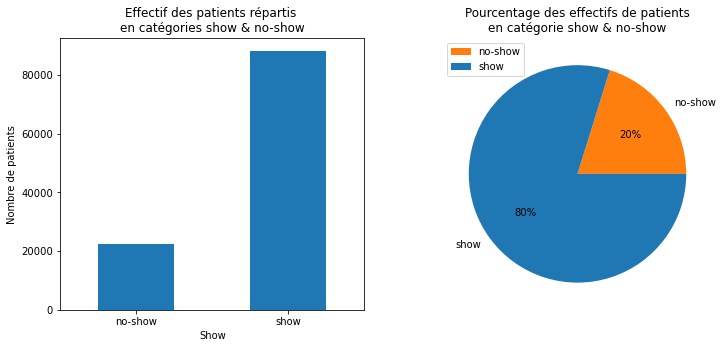

In [33]:
# Présentons les effectifs et leur proportions sur un graphique
plt1_elements = {'title':'Effectif des patients répartis \nen catégories show & no-show',\
                 'xlabel':'Show','ylabel':'Nombre de patients'}
plt2_elements = {'title':'Pourcentage des effectifs de patients\nen catégorie show & no-show'}
display_subplots(effectifs_show, plt1_elements, plt2_elements)

On peut voir que l'effectif des patients qui se sont présentés à leur rendez-vous médical (**80%**) est nettement supérieur à celui des patients qui ne se sont pas présentés (**20%**).

Voyons un peu la répartition de l'effectif total par tranches d'ages.

In [34]:
# Les variables qui suivent nous serviront de filtre tout au long de l'analyse
show = df.Show==1 # Les patients qui se sont présentés à leur rendez-vous
no_show = df.Show==0 # Les patients qui ne se sont pas présentés

,Age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


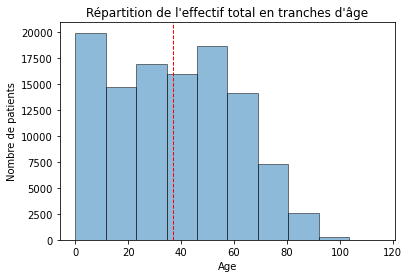

In [35]:
# Construisons un histogramme qui montre la répartition en tranches d'âge de l'ensemble de l'effectif 
ax = df.Age.hist(edgecolor='black', alpha=0.5,);
ax.set_xlabel('Age')
ax.set_ylabel('Nombre de patients')
ax.grid(False)
plt.axvline(df.Age.mean(), color='r', linestyle='dashed', linewidth=1)
ax.set_title("Répartition de l'effectif total en tranches d'âge")
pd.DataFrame(df.Age.describe())

On peut constater que la moyenne d'âge est **37 ans**. L'essentiel de l'effectif (**75%**) se situe entre '**0**' et '**55 ans**'.  
Essayons de regarder la répartition des '**no-show**' en tranches d'âge

,Age
count,22319.000000
mean,34.317667
std,21.965941
min,0.000000
25%,16.000000
50%,33.000000
75%,51.000000
max,115.000000


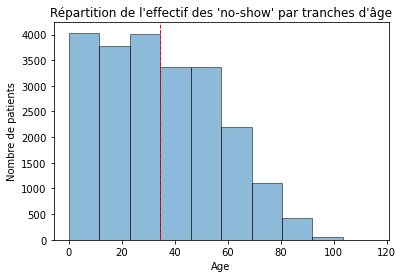

In [36]:
# Histogramme montrant la répartition en tranche d'âge de l'effectif 'no-show'
ax = df.Age[no_show].hist(edgecolor='black', alpha=0.5,);
ax.set_xlabel('Age')
ax.set_ylabel('Nombre de patients')
ax.grid(False)
plt.axvline(df.Age[no_show].mean(), color='r', linestyle='dashed', linewidth=1)
ax.set_title("Répartition de l'effectif des 'no-show' par tranches d'âge");
pd.DataFrame(df.Age[no_show].describe())

Les tendances semblent être maintenues. La moyenne d'âge est **34 ans**, Le plus gros de l'effectif se situe entre **0** et **55 ans**.  

Voyons maintenant ce que nous donne la répartition en genre.

,Show
Gender,
F,71839
M,38687


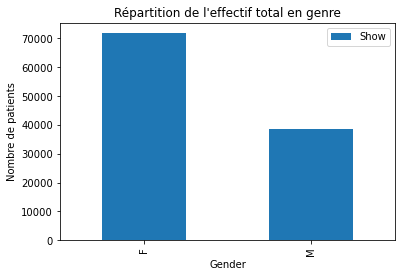

In [37]:
# Répartition de l'effectif total en genre
ax = df.groupby(['Gender'])[['Show']].count().plot(kind='bar');
ax.set_ylabel('Nombre de patients')
ax.set_title("Répartition de l'effectif total en genre");
df.groupby(['Gender'])[['Show']].count()

On observe que la population féminine de patients dépasse celle masculine.  
Reprenons la même chose pour l'effectif des '**no-show**'

,Show
Gender,
F,14594
M,7725


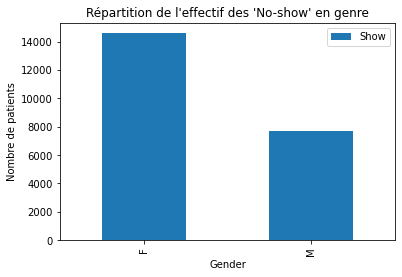

In [38]:
# Répartition de l'effectif des 'no-show' en genre
ax = df[no_show].groupby(['Gender'])[['Show']].count().plot(kind='bar');
ax.set_ylabel('Nombre de patients')
ax.set_title("Répartition de l'effectif des 'No-show' en genre");
df[no_show].groupby(['Gender'])[['Show']].count()

La tendance se confirme, la population féminine de patient est plus nombreuse que le population masculine même pour le groupe de patients qui ne se sont pas présentés à leur rendez-vous médical.

### Les patients ne respecteraient-il pas leur rendez-vous par simple oubli ?
> Il peut arriver qu'un patient oublit sont rendez-vous. Le SMS de rappel a été justement mis en place pour répondre à celà. Pour répondre à notre question nous allons dans un premier temps voir les effectifs de patients qui ont reçu ou non un SMS de rappel. Nous allons ensuite voir pour chaque cas (SMS reçu ou pas) les effectifs de patients qui se sont présentés ou pas à leur rendez-vous.

In [39]:
# Créons un dictionnaire d'encodage des valeurs de SMS_received pour rendre les graphiques plus descriptifs
# 0 ='non reçu' pour ceux qui n'ont pas reçu de SMS de rappel, 1 ='reçu' pour ceux qui en ont reçu
sms_val_encoded_dict = {0:'non reçu', 1:'reçu'}

In [40]:
# Effectif de ceux qui on reçu ou non un SMS de rappel
effectifs_sms = encode_bool_indexes(df.SMS_received.value_counts().sort_index(),sms_val_encoded_dict)
effectifs_sms

non reçu    75044
reçu        35482
Name: SMS_received, dtype: int64

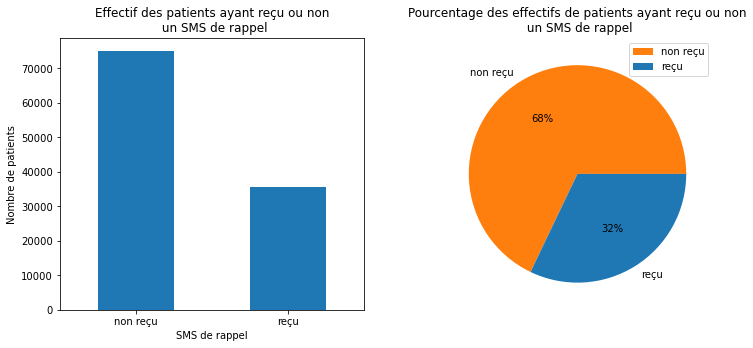

In [41]:
# Présentons les effectifs et leur proportions sur un graphique
plt1_elements = {'title':'Effectif des patients ayant reçu ou non\n un SMS de rappel',\
                 'xlabel':'SMS de rappel','ylabel':'Nombre de patients'}
plt2_elements = {'title':'Pourcentage des effectifs de patients ayant reçu ou non\n un SMS de rappel'}
display_subplots(effectifs_sms, plt1_elements, plt2_elements)

Seul **32%** de l'effectif total a reçu un SMS de rappel, **68%** n'en ont pas reçu.

Voyons maintenant le nombre de ceux qui se sont présentés à leur rendez-vous **'show'** et ceux qui ne se sont pas présentés **'no-show'**

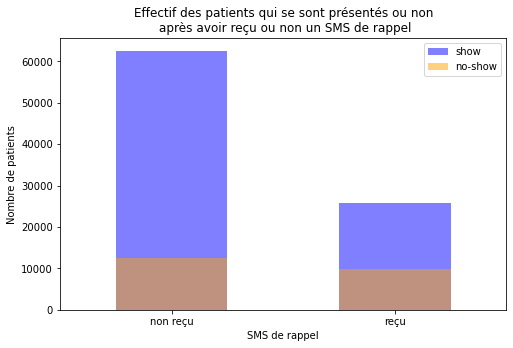

In [42]:
# Ceux qui se sont présentés avec ou sans SMS de rappel
sms_recieved_eff = encode_bool_indexes(df.SMS_received[show].value_counts().sort_index(),sms_val_encoded_dict)
# Ceux qui ne se sont pas présenté avec ou sans SMS de rappel
sms_not_recieved_eff = encode_bool_indexes(df.SMS_received[no_show].value_counts().sort_index(),sms_val_encoded_dict)
# tracé du graphique
sms_recieved_eff.plot(kind='bar', alpha=0.5, color= 'blue', label='show', figsize=(8,5), rot=0)
sms_not_recieved_eff.plot(kind='bar', alpha=0.5, color= 'orange', label='no-show', rot=0)
plt.title('Effectif des patients qui se sont présentés ou non\n après avoir reçu ou non un SMS de rappel')
plt.xlabel('SMS de rappel')
plt.ylabel('Nombre de patients')
plt.legend();

On peut remarquer que le nombre de patients qui s'est présentés au rendez-vous sans avoir reçu de SMS de rappel dépasse largement le nombre de patients qui ne se sont pas présentés. De même le nombre de patients qui ont reçu un SMS de rappel et se sont présentés à leur rendez-vous dépasse le nombre de ceux qui ne se sont pas présentés.


### L'aide sociale serait-elle un facteur qui expliquerait le fait qu'un patient ne se présente pas à son rendez-vous  ?

Regardons un peu la proportion des patients qui recoivent ou non l'aide sociale sur l'ensemble de l'effectif.

In [43]:
# Dictionnaire d'encodage des valeur de scholarship
scholarship_val_enc = {0:'ne reçoit pas', 1:'reçoit'}

In [44]:
# Affichons le nombre de patients qui reçoivent une aide médicale (Scholarship=1)
# et ceux qui n'en reçoivent pas (Scholarship=0)
effectifs_scholarship = encode_bool_indexes(df.Show.value_counts().sort_index(),scholarship_val_enc)
effectifs_scholarship

ne reçoit pas    22319
reçoit           88207
Name: Show, dtype: int64

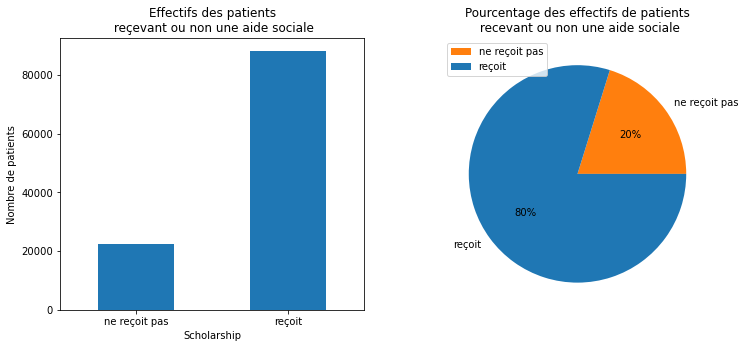

In [45]:
# Présentons les effectifs et leur proportions sur un graphique
plt1_elements = {'title':'Effectifs des patients\n reçevant ou non une aide sociale',\
                 'xlabel':'Scholarship','ylabel':'Nombre de patients'}
plt2_elements = {'title':'Pourcentage des effectifs de patients\n recevant ou non une aide sociale'}
display_subplots(effectifs_scholarship, plt1_elements, plt2_elements)

Sur l'ensemble de l'effectif seul **10%** recoivent une aide sociale.  
Prenons maintenant l'ensemble de l'effectif '**no-show**' et voyons combien reçoivent une aide sociale ou pas.

In [46]:
# Effectif de no-show qui recoivent ou pas une aide sociale
plt1_elements = {'title':'Effectifs des patients no-show\n reçevant ou non une aide sociale',\
                 'xlabel':'Scholarship','ylabel':'Nombre de patients'}
plt2_elements = {'title':'Pourcentage des effectifs de patients\n recevant ou non une aide sociale'}
eff_scholarship_no_show = encode_bool_indexes(df.Scholarship[no_show].value_counts().sort_index(),scholarship_val_enc)
eff_scholarship_no_show

ne reçoit pas    19741
reçoit            2578
Name: Scholarship, dtype: int64

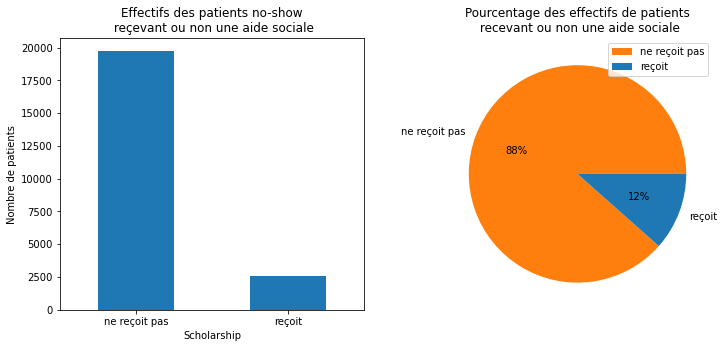

In [47]:
# Présentons les effectifs et leur proportions sur un graphique
display_subplots(eff_scholarship_no_show, plt1_elements, plt2_elements)

On peut constater que la majorité (**88%**) des patients qui ne se sont pas présentés à leur rendez-vous médical n'ont pas d'aide sociale.  
Essayons de répartir cet effectif par âge et par nombre pour voir si nous trouverons des particularités dans la tendance.

,Age
count,19741.000000
mean,34.950864
std,22.530599
min,0.000000
25%,17.000000
50%,33.000000
75%,52.000000
max,115.000000


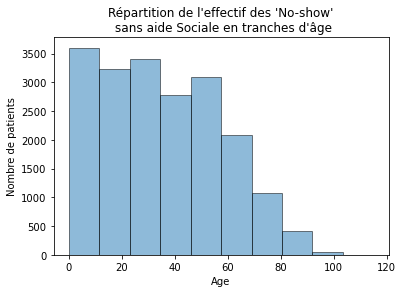

In [48]:
# Histogramme de l'âge des patients qui n'ont pas d'aide sociale
# et qui ne se sont pas présentés à leur rendez-vous
ax = df.query('Scholarship==0 & Show==0').Age.hist(edgecolor='black', alpha=0.5,);
ax.set_xlabel('Age')
ax.set_ylabel('Nombre de patients')
ax.grid(False)
ax.set_title("Répartition de l'effectif des 'No-show'\n sans aide Sociale en tranches d'âge");
pd.DataFrame(df.query('Scholarship==0 & Show==0').Age.describe())

Nous obtenons presque exactement la même répatition qu'au niveau de l'effectif total des '**No-show**'

,Show
Gender,
F,12488
M,7253


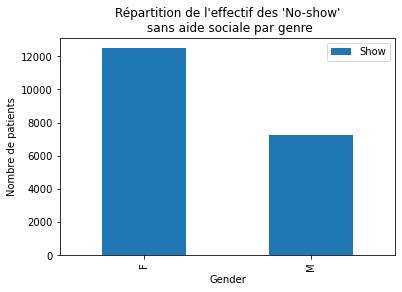

In [49]:
# Diagramme de la répartition en genre des patients qui n'ont pas d'aide sociale
# et qui ne se sont pas présentés à leur rendez-vous
ax = df.query('Scholarship==0 & Show==0').groupby(['Gender'])[['Show']].count().plot(kind='bar');
ax.set_ylabel('Nombre de patients')
ax.set_title("Répartition de l'effectif des 'No-show'\n sans aide sociale par genre");
df.query('Scholarship==0 & Show==0').groupby(['Gender'])[['Show']].count()

Les observations n'ont pas non plus changées pour le genre, les femmes sont toujours dominants.

<a id='conclusions'></a>
## Conclusions

Sur un effectif total de **110 526** patients programmés pour un rendez-vous médical, seul **22 319** soit **20%** de l'effectif ne s'est pa présenté au rendez-vous. Le plus gros de l'effectif total de patients se situe entre **0** et **55 ans** (**75%**), et le genre féminin '**F**' est majoritaire. Les mêmes observations sont faites au niveau de l'effectif de patients qui ne se sont pas présentés à leur rendez-vous. La non réception d'un SMS de rappel ne saurait expliqué qu'un patient ai manqué son rendez-vous puisque seulement **32%** de l'effectif total a reçu un SMS de rappel. Aussi l'effectif des patients qui se sont présentés à leur rendez-vous sans avoir reçu un SMS de rappel dépasse nettement ceux qui ne se sont pas présentés. Cependant On peut constater que la majorité (**88%**) des patients qui ne se sont pas présentés à leur rendez-vous médical ne recoivent pas d'aide sociale. La répartition par tranche d'âge et genre réflète les observations faites au niveau de l'effectif total. Si donc nous considérons que l'effectif de ceux qui ne se sont pas présenté à leur rendez-vous médical appartient à une frange démunie de la population, il est possible que l'aide sociale soit un facteur clé pouvant expliqué qu'un patient se présente ou non à son rendez-vous. Seulement dans notre contexte nous ne sauront statuer là-dessus, car il existe probalement d'autres facteurs que nous ne maîtrisons pas, qui peuvent aussi influencer le résultat.
#### Limitations
Une des limitations que nous pouvons relever à notre analyse concerne la disproportion entre le genre feminin et masculin dans l'effectif total. Effectivent le nombre de patients du genre feminin dépasse considérablement celui du genre opposé. Cette observation s'est réflétée dans les résultats, notamment celui concernant le rôle important que pourrait jouer l'aide sociale. Les proportions homme-femme de l'étude auraient-été équivalentes, nous aurions pu confirmer si le genre feminin était réellement le plus représentatif de l'effectif des '**No-show**'; ce qui pourrait aider à mieux orienter l'octroie de l'aide sociale.  

Des informations complémentaires concernant l'aide sociale en question peuvent être trouvées à cette adresse [Bolsa Família](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)